# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

## Dataset

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

It is part of a larger database published with the following paper:

Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon.

## Attributes

- Fresh: annual spending (m.u.) on fresh products (Continuous)
- Milk: annual spending (m.u.) on milk products (Continuous)
- Grocery: annual spending (m.u.)on grocery products (Continuous)
- Frozen: annual spending (m.u.)on frozen products (Continuous)
- Detergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous)
- Delicatessen: annual spending (m.u.)on and delicatessen products (Continuous)

## Descriptive statistics

**Attribute: (Minimum, Maximum, Mean, Std. Deviation)**

- Fresh: ( 3, 112151, 12000.30, 12647.329)
- Milk: (55, 73498, 5796.27, 7380.377)
- Grocery: (3, 92780, 7951.28, 9503.163)
- Frozen: (25, 60869, 3071.93, 4854.673)
- Detergents_Paper: (3, 40827, 2881.49, 4767.854)
- Delicatessen: (3, 47943, 1524.87, 2820.106)


In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.extmath import fast_dot
%load_ext rpy2.ipython

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [459]:
# look at range of values
for i in data.columns:
    print '{}: {} to {}'.format(i, data[i].min(), data[i].max())

Fresh: 3 to 112151
Milk: 55 to 73498
Grocery: 3 to 92780
Frozen: 25 to 60869
Detergents_Paper: 3 to 40827
Delicatessen: 3 to 47943


In [460]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [287]:
# Look at data with R
# %load_ext rpy2.ipython

%R -i data print(summary(data))

     Fresh             Milk          Grocery          Frozen       
 Min.   :     3   Min.   :   55   Min.   :    3   Min.   :   25.0  
 1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153   1st Qu.:  742.2  
 Median :  8504   Median : 3627   Median : 4756   Median : 1526.0  
 Mean   : 12000   Mean   : 5796   Mean   : 7951   Mean   : 3071.9  
 3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656   3rd Qu.: 3554.2  
 Max.   :112151   Max.   :73498   Max.   :92780   Max.   :60869.0  
 Detergents_Paper   Delicatessen         total       
 Min.   :    3.0   Min.   :    3.0   Min.   :   904  
 1st Qu.:  256.8   1st Qu.:  408.2   1st Qu.: 17449  
 Median :  816.5   Median :  965.5   Median : 27492  
 Mean   : 2881.5   Mean   : 1524.9   Mean   : 33226  
 3rd Qu.: 3922.0   3rd Qu.: 1820.2   3rd Qu.: 41308  
 Max.   :40827.0   Max.   :47943.0   Max.   :199891  


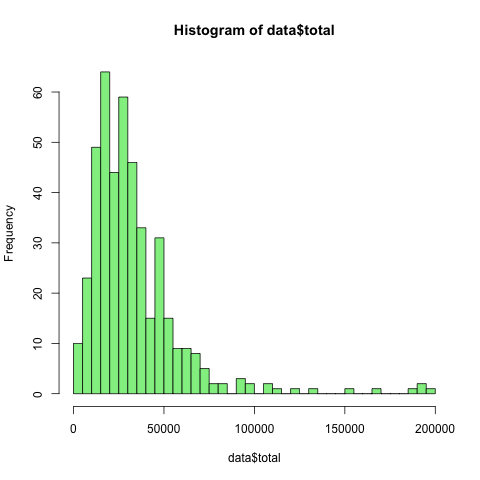

<ListVector - Python:0x11fa46050 / R:0x12407d340>
[Float..., IntVe..., Float..., Float..., StrVe..., Vector]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x11fa46f80 / R:0x11f610bb0>
[0.000000, 5000.000000, 10000.000000, ..., 190000.000000, 195000.000000, 200000.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x11fa46fc8 / R:0x11f619860>
[      10,       23,       49, ...,        1,        2,        1]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x11fa463f8 / R:0x11f618a60>
[0.000005, 0.000010, 0.000022, ..., 0.000000, 0.000001, 0.000000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x11fa45758 / R:0x11f61dc40>
[2500.000000, 7500.000000, 12500.000000, ..., 187500.000000, 192500.000000, 197500.000000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x11fa7ef80 / R:0x1230feae8>
[str]
  equidist: <class 'rpy2.robjects.vectors.Vector'

In [291]:
# Plot data with R
%R -i data hist(data$total, col='lightgreen', breaks=50)

/Users/jjl/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/jjl/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


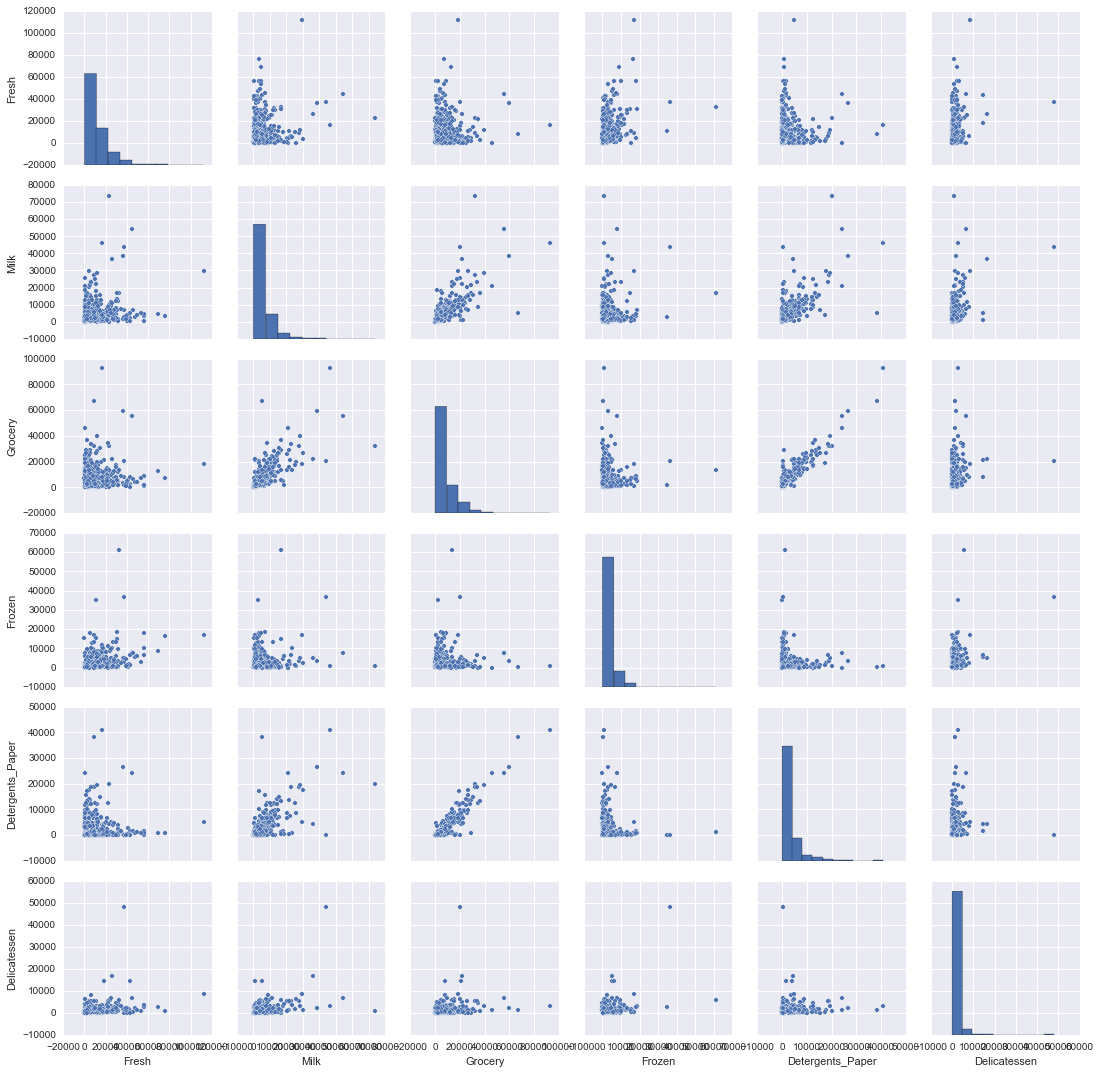

In [4]:
# scatterplot matrix
# https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html
# sns.pairplot(df, hue="species")

import seaborn as sns
sns.set()
sns.pairplot(data)

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

> **Before**:
- Frozen and Detergents_Paper have similar mean/variance.
- Fresh, Milk, Frozen, Grocery? will be related as unprepared foods
- Delicatessen (prepared foods) will be uncorrelated to unprepared foods
- Perishable vs Non-perishable goods

> **After**:
- Grocery appears correlated to Detergents_Paper and Milk.<br>
- Delicatessen appears uncorrelated to other features.


### [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=len(data.columns), copy=True, whiten=False)

# fit the data
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print data.columns
print 'components:\n', pca.components_
print '\n% variance explained:\n', pca.explained_variance_ratio_

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')
components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]

% variance explained:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


In [165]:
# scale data
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# keep original unscaled data
data_orig = data

# fit and transform/scale the data
data_scaled = min_max_scaler.fit_transform(data_orig)
data = pd.DataFrame(data_scaled, columns=data_orig.columns)

In [93]:
# function to peform pca on a dataset
def doPCA(n=2, dataset=data):
    pca = PCA(n_components=n, copy=True, whiten=False)
    pca.fit(dataset)
    return pca

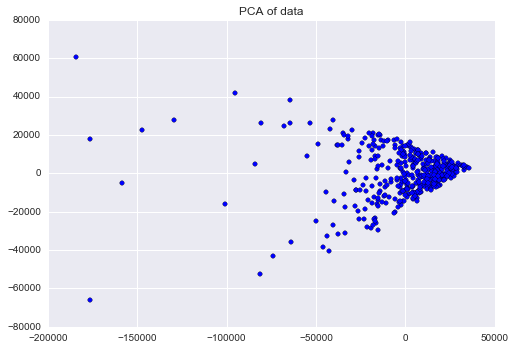

In [279]:
# transform and plot data
pca_2 = doPCA(2, data)
transformed_data = pd.DataFrame(pca_2.transform(data))

plt.figure()
plt.scatter(transformed_data[0], transformed_data[1])
plt.title('PCA of data')
plt.show()

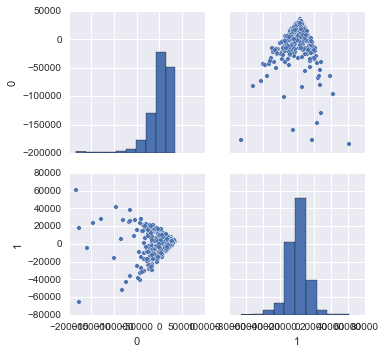

In [280]:
sns.set()
sns.pairplot(transformed_data)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
> Variance drops by approximately half (~ 40-60%) with each dimension, starting with the first dimension explaining 52% of variance.

> I would use 4 dimensions in order to capture > 95% of the variance explained. This threshold appears often in scientific studies and seems like a  reasonable (although the application here is not quite the same).

**3)** What do the dimensions seem to represent? How can you use this information?

http://stats.stackexchange.com/questions/35319/what-is-the-relationship-between-independent-component-analysis-and-factor-analy
> In PCA, you are finding basis vectors that 'best explain' the variance of your data. The first (ie highest ranked) basis vector is going to be one that best fits all the variance from your data. The second one also has this criteria, but must be orthogonal to the first, and so on and so forth. (Turns out those basis vectors for PCA are nothing but the eigenvectors of your data's covariance matrix).

Answer: 
> The first dimension shows that 'Milk', 'Grocery', and 'Detergents_Paper' have a distinct correlation.
     
> This information can be used in the learning algorithm to put greater weight on the feature 'Fresh' when segmenting customers.
     

### [ICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

In [6]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=None, algorithm='parallel', whiten=True, fun='logcosh', \
              fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)

# fit the data
ica.fit(data)

# Print the independent components
print ica.components_

[[  3.01428917e-07  -2.29197739e-06  -1.20990729e-05   1.46047637e-06
    2.82137844e-05   5.73480775e-06]
 [  3.86357702e-07   2.19515221e-07   6.01819192e-07   5.22077398e-07
   -5.11093046e-07  -1.80929365e-05]
 [ -1.53306407e-07  -9.84697513e-06   5.80508881e-06   3.64724334e-07
   -3.30103485e-06   6.05984307e-06]
 [  8.65290741e-07   1.40159120e-07  -7.74428320e-07  -1.11460652e-05
    5.56700244e-07   5.95254851e-06]
 [  2.11518534e-07  -1.89652761e-06   6.35651549e-06   4.20145606e-07
   -6.46415201e-07  -1.42082550e-06]
 [ -3.97573820e-06   8.57493542e-07   6.15633524e-07   6.78180772e-07
   -2.04252081e-06   1.04808353e-06]]


In [222]:
# function to peform ica on a dataset
def doICA(n=2, dataset=data):
    ica = FastICA(n_components=None, algorithm='parallel', whiten=True, fun='logcosh', \
                  fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ica.fit(dataset)
    return ica

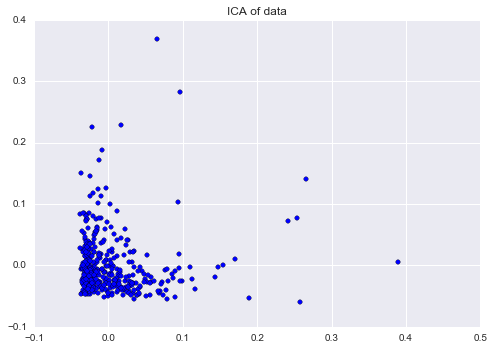

In [223]:
# transform and plot data
ica_2 = doICA(2, data)
transformed_data = pd.DataFrame(ica_2.transform(data))

plt.figure()
plt.scatter(transformed_data[0], transformed_data[1])
plt.title('ICA of data')
plt.show()

In [252]:
# look at first row(s) of orig data & transformed data, ica components
print 'orig 1st row:\n', data[:1]
print 'orig data means:\n', data.mean()

print '\n', ica_2.components_
print '\ntrans 1st row:\n', transformed_data[:5]

print (data.iloc[:5] - data.mean()).dot(ica_2.components_.transpose())

orig 1st row:
     Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.11294  0.130727  0.081464  0.003106          0.065427      0.027847
orig data means:
Fresh               0.106977
Milk                0.078173
Grocery             0.085671
Frozen              0.050078
Detergents_Paper    0.070510
Delicatessen        0.031745
dtype: float64

[[ -8.45652009e-03   1.35605347e-01   1.60206172e-01  -6.35734086e-03
    1.80527595e-01   2.19966161e-02]
 [  3.36662935e-01   7.22067079e-02   1.52879324e-04   1.54656084e-01
   -4.75504104e-02   8.48106654e-02]]

trans 1st row:
          0         1
0  0.005698 -0.001552
1  0.012647 -0.014255
2  0.011300 -0.005247
3 -0.025758  0.010968
4 -0.006107  0.041388
          0         1
0  0.005698 -0.001552
1  0.012647 -0.014255
2  0.011300 -0.005247
3 -0.025758  0.010968
4 -0.006107  0.041388


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?
> In ICA, you are again finding basis vectors, but this time, you want basis vectors that give a result, such that this resulting vector is one of the independent components of the original data. You can do this by maximization of the absolute value of normalized kurtosis - a 4th order statistic. That is, you project your data on some basis vector, and measure the kurtosis of the result. You change your basis vector a little, (usually through gradient ascent), and then measure the kurtosis again, etc etc. Eventually you will happen unto a basis vector that gives you a result that has the highest possible kurtosis, and this is your independent component.

https://www.cs.princeton.edu/picasso/mats/ica-notes_jp.pdf
> Find a basis along which the data (when projected) is statistically independent. This is equivalent to saying: for a every data point, the knowledge of x in no way provides you with any information about y. In information theory, the mutual information between P(x) and P(y) is zero

> The fundamental restriction in ICA is that the independent components must be nongaussian for ICA to be possible.

Answer: 
> Each vector transforms the features into a space where new features are statistically independent of each other yet still retain mutual information with the original features. The components can be used to create transformed features that can then be used to fit a classifier.

## Clustering

In this section you will choose either [K Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering or [Gaussian Mixed Models](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html) clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

> **K Means**: Simple, fast and effective method to partition data points into groups (clusters). Can be used to classify data into distinct classes.

> Hard assignment to clusters. Assumes spherical clusters with equal probability of a cluster. Sensitive to starting conditions (k value, initilization) leads to local hill-climbing

> **Gaussian Mixture Models**: Uses probability to determine likelihood of an example belonging to a cluster. will not diverge. Works with data of any distribution, not just Gaussian.
Soft assignment can express uncertainty. It starts with a prior belief about each point's cluster assignment. As it goes on, it revises those beliefs with the degree of uncertainty about the assignment.

> The parameters of K-means are typically the cluster assignments ("z") and the means ("mu"). The parameters of a GMM are typically these (z and mu) as well as the class prior probabilities ("pi") and cluster covariances ("Sigma"). 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [7]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [8]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2, copy=True, whiten=False)
pca.fit(data)

reduced_data = pca.transform(data)

print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [15]:
# using ICA to recover data sources
ica = FastICA(n_components=None, algorithm='parallel', whiten=True, fun='logcosh', \
              fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)

# fit and transform the data
ica_data = ica.fit_transform(data)
print ica_data[:5]

[[ 0.01499481  0.03204808 -0.01048731 -0.00130297  0.00286567  0.04186827]
 [ 0.01911445  0.01135711  0.00041207  0.02261957 -0.00549313  0.02969822]
 [-0.04782038  0.04114495 -0.01817535  0.02975925 -0.11668674 -0.00561933]
 [ 0.00454109 -0.03355693 -0.01216949 -0.00388411 -0.00457445 -0.03409655]
 [-0.00427355  0.02148961 -0.00593591 -0.03633006 -0.06165563 -0.02393711]]


#### K Means

#### How to choose number of clusters?
We can use [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py) to study the separation distance between potential clusters and choose an optimal value for `n_clusters`.
> The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

> Silhoette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.

In [9]:
from sklearn.metrics import silhouette_score

def cluster_silhouette(n=12, data=reduced_data, rand=0):
    for n_clusters in range(2,n):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=rand)
        cluster_labels = clusterer.fit_predict(data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into cluster density and separation
        silhouette_avg = silhouette_score(reduced_data, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
cluster_silhouette(10)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.54260629285749551)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.52291208240435094)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.47655273905238205)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.45136544640513643)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.43156890538615494)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.41617113755792973)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.41352644934659755)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.41142313988833906)


In [441]:
# function to plot k vs Sum of distances of samples to their closest cluster center
def choose_k(n=10):
    perf = [[], []]
    for i in range(n):
        est = KMeans(n_clusters=i+1, random_state=0)
        clusters = est.fit(reduced_data)
        perf[0].append(i+1)
        perf[1].append(clusters.inertia_)
    return perf

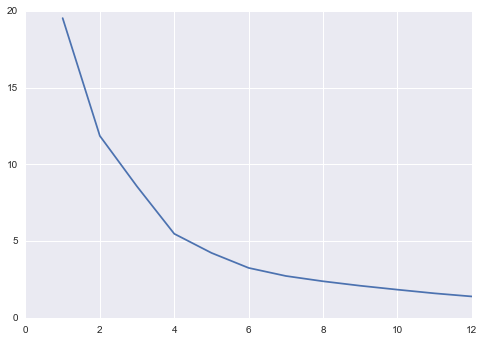

In [444]:
# plot k vs Sum of distances of samples to their closest cluster center
perf = choose_k(12)
plt.clf()
plt.plot(perf[0], perf[1])
plt.show()

In [448]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
est = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, \
             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

clusters = est.fit(reduced_data)

print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [449]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids
print clusters.inertia_
print clusters.labels_[:10]

[[-0.03757544 -0.25475726]
 [-0.07401544  0.02476398]
 [ 0.16126939  0.05832959]
 [ 0.79607443 -0.03866579]]
5.47522819303
[1 2 1 1 1 1 1 1 1 2]


#### Build the plot

In [450]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

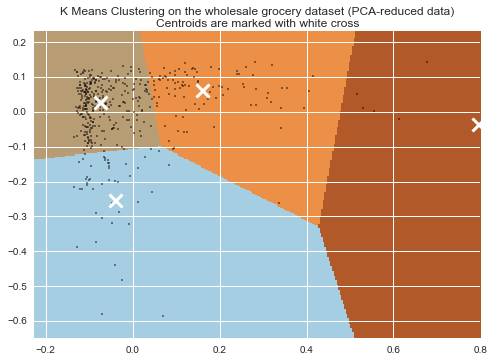

In [454]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K Means Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min/5, x_max/3)
plt.ylim(y_min/3, y_max/5)
#plt.xticks(())
#plt.yticks(())
plt.show()

#### [K Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) with original data

In [9]:
# choosing k
cluster_silhouette(n=12, data=data, rand=0)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.54260629285749551)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.52242464796673893)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.45429763334703027)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.45222182683371714)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.4030723075605292)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.4272406392056447)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.41121003970959807)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.41447689065915178)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.39921952468085481)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.40291532031664334)


In [9]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
est = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, tol=0.0001, \
             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

# fit the original data
clusters_originaldata = est.fit(data)

[[  3542.08605212  -4936.7212132 ]
 [  5710.98964991  12661.45687292]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]]


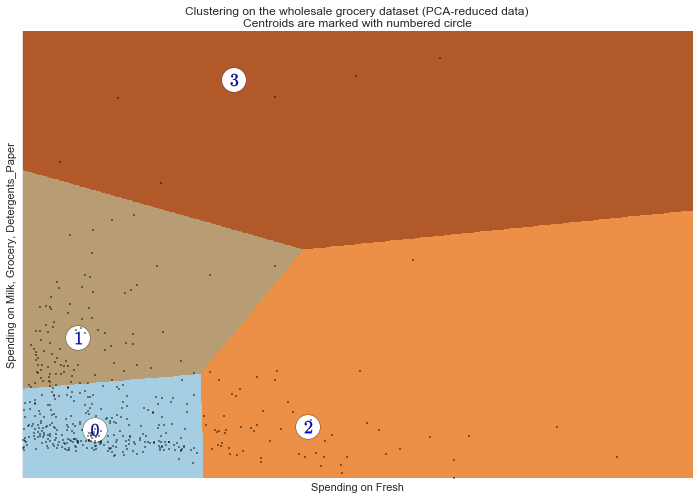

In [17]:
# fit data with different number of clusters
k_clusters = 4
est = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, \
             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

clusters = est.fit(reduced_data)

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

# Find the centroids for KMeans
centroids = clusters.cluster_centers_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)

# Labeling the clusters with x's
'''
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
'''
# Draw white circles at cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='o', c="white", alpha=1, s=600)

for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=150)

plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with numbered circle')
plt.xlim(x_min/1.4, x_max)
plt.ylim(y_min, y_max/1.4)
plt.xticks(())
plt.yticks(())
plt.xlabel('Spending on Fresh')
plt.ylabel('Spending on Milk, Grocery, Detergents_Paper')
plt.gca().invert_xaxis()
plt.gcf().set_size_inches(12,8)

# label points with cluster labels from clustering original data
'''
for i, txt in enumerate(clusters_originaldata.labels_):
    if i%5 == 0:
        plt.annotate(txt, (reduced_data[i, 0], reduced_data[i, 1]))
'''

plt.show()

#### [K Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) with ICA transformed data

In [16]:
# choosing k
cluster_silhouette(n=12, data=ica_data, rand=0)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.60100289282604646)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.46706942151667213)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.41984934157519066)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.15988588593117606)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.086127981073555418)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.087315610298253313)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.019471061892191114)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.014612066994117297)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.099945864188133865)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.058293997980053421)


#### GMM

In [510]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
est = GMM(n_components=5, covariance_type='diag', random_state=None, thresh=None, tol=0.001, \
          min_covar=0.001, n_iter=100, n_init=1, params='wmc', init_params='wmc', verbose=0)

clusters = est.fit(reduced_data)

print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [511]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print centroids

[[  7220.96832617   6005.42357897]
 [ -4816.58570619  -5806.24630226]
 [  6544.94645781  -6502.58522857]
 [-22244.41669326  -3543.27135452]
 [ -9420.91328272  31861.39346964]]


#### Build the plot

In [512]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

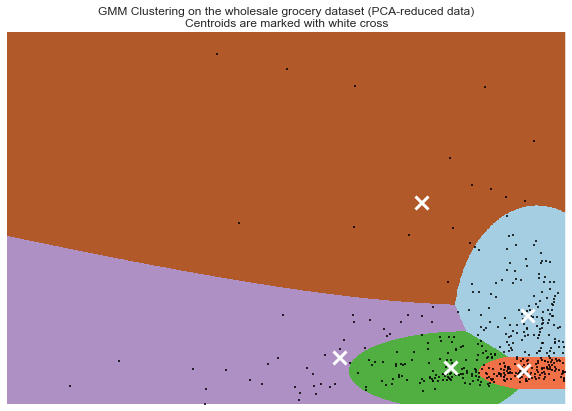

In [513]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('GMM Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min/1.4, x_max)
plt.ylim(y_min, y_max/1.4)
plt.xticks(())
plt.yticks(())
plt.gcf().set_size_inches(10,6.67)
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
> The central objects are the centroids which indicate the point within a cluster where distance to the cluster's data points is minimized. In this example, they could represent the average or prototypical customer within that customer segment.

> ### <div align='center'>PCA components</div>

> |      |Fresh|  Milk|  Grocery|  Frozen|  Detergents_Paper|  Delicatessen|
  |-----------------------------------------------------------------|
  |x axis| -0.976| -0.121| -0.061| -0.152| 0.007| -0.068|
  |y axis| -0.110|  0.515|  0.764| -0.018| 0.365| 0.057 |

> The x axis shows that the first PCA dimension is largely related to spending on 'Fresh' items, with greater spending showing up in data points toward the left and less spending to the right.

> The y axis shows the second PCA dimension, with data points toward the top show greater spending on 'Milk', 'Grocery', and 'Detergents_Paper' categories.

> When using 4 clusters, we can see in the plot (x-axis reversed) that:

> 1. The lower right cluster groups customers who spend a lot on 'Fresh', but generally less on everything else.
2. The lower left cluster has customers who spend average or less than others on 'Fresh', in addition to 'Milk', 'Grocery', and 'Detergents_Paper'.
3. The left middle cluster shows customers who spend less on 'Fresh', but spend more than others on 'Milk', 'Grocery', and 'Detergents_Paper'.
4. The top cluster shows customers who spend a lot on 'Milk', 'Grocery', and 'Detergents_Paper', whether or not they spend more on 'Fresh' or not.  

> Most of the data is located close together in the lower right corner of the plot, with clusters that aren't very well distinguished. The visualization might be improved by reducing the data to 3 dimensions instead of 2 and producing a 3d plot to see if more distinguished clusters can be revealed.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
> ICA gave the most insight into the data by recovering hidden features within the data, which in this case would be customer segments or possibly even distinct types of businesses (eg, restaurant, bar, coffee shop, etc).

> Using GMM appeared to show clearer segments within the data, producing 3 relatively dense clusters and 1 cluster sparsely populated with outliers. Using K Means produced similar centroids but with cluster borders that appear less useful in separating data points.

**9)** How would you use that technique to help the company design new experiments?

Answer: 
> The company could attempt to segment customers by delivery time preferred.

**10)** How would you use that data to help you predict future customer needs?

Answer: 
> The customer segments could be used to predict changes in spending behavior as overall spending amount increases or decreases.